# Importing Packages and Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
from datetime import datetime, timedelta
from ipywidgets import interact
from typing import List
import random

print('All packages are imported successfully!')

All packages are imported successfully!


In [2]:
#Loading dataset
raw_data=pd.read_csv(r'C:\Users\aturk\Downloads\wtbdata_245days.csv')
raw_data.head()

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4727520 entries, 0 to 4727519
Data columns (total 13 columns):
 #   Column   Dtype  
---  ------   -----  
 0   TurbID   int64  
 1   Day      int64  
 2   Tmstamp  object 
 3   Wspd     float64
 4   Wdir     float64
 5   Etmp     float64
 6   Itmp     float64
 7   Ndir     float64
 8   Pab1     float64
 9   Pab2     float64
 10  Pab3     float64
 11  Prtv     float64
 12  Patv     float64
dtypes: float64(10), int64(2), object(1)
memory usage: 468.9+ MB


# Inspecting and Treating Missing Values

In [4]:
#inspecting and imputing missing values
print("Number of missing values per column:\n")
print(raw_data.isnull().sum())

Number of missing values per column:

TurbID         0
Day            0
Tmstamp        0
Wspd       49518
Wdir       49518
Etmp       49518
Itmp       49518
Ndir       49518
Pab1       49518
Pab2       49518
Pab3       49518
Prtv       49518
Patv       49518
dtype: int64


In [5]:
#Creating dataframe for missing values
mv=raw_data[raw_data.isnull().any(axis=1)]
num_na_values, total_values=len(mv), len(raw_data)

In [6]:
raw_data.shape

(4727520, 13)

In [7]:
mv.shape

(49518, 13)

In [8]:
mv.head()

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1440,1,11,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2880,1,21,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3694,1,26,15:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4320,1,31,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(f"\nThe dataset contains {total_values} rows, of which {num_na_values} include some missing values.\n\nThis is {(num_na_values/total_values)*100:.3f}% of the total data.")


The dataset contains 4727520 rows, of which 49518 include some missing values.

This is 1.047% of the total data.


In [10]:
# Create a boolean mask for rows with both NaN and non-NaN values
mask_both_na_and_non_na = mv.isnull().any(axis=1) & mv.notnull().any(axis=1)

# Use the mask to filter rows in 'mv'
rows_both_na_and_non_na = mv[mask_both_na_and_non_na]

# Get the number of rows with both NaN and non-NaN values
num_rows_both_na_and_non_na = len(rows_both_na_and_non_na)

print(f"Number of rows with both NaN and non-NaN values: {num_rows_both_na_and_non_na}")

Number of rows with both NaN and non-NaN values: 49518


In [11]:
# Create a boolean mask for rows with all NaN values
mask_all_na = mv.isnull().all(axis=1)

# Use the mask to filter rows in 'mv'
rows_all_na = mv[mask_all_na]

# Get the number of rows with all NaN values
num_rows_all_na = len(rows_all_na)
print(f"Number of rows that have 100% missing values:{num_rows_all_na}")

Number of rows that have 100% missing values:0


In [12]:
#Display button to inspect missing values

def inspect_missing_values(mv_df: pd.core.frame.DataFrame, num_samples: int, output:widgets.Output):
    
    def on_button_clicked(b):
        with output:
            output.clear_output()
            random_index = random.sample([*range(len(mv_df))], num_samples)
            display(mv_df.iloc[random_index].head(num_samples))
            
    return on_button_clicked

In [13]:
button=widgets.Button(description="Inspect")
output=widgets.Output()
display(button, output)
        
#Number of samples to inspect each time
num_samples=5

#inspect missing values by clicking button
button.on_click(inspect_missing_values(mv, num_samples, output))        


Button(description='Inspect', style=ButtonStyle())

Output()

In [14]:
#Missing values count only 1% of all datsets, drop missing values
raw_data = raw_data.dropna()

print("Number of missing values by column:\n")
print(raw_data.isnull().sum())

Number of missing values by column:

TurbID     0
Day        0
Tmstamp    0
Wspd       0
Wdir       0
Etmp       0
Itmp       0
Ndir       0
Pab1       0
Pab2       0
Pab3       0
Prtv       0
Patv       0
dtype: int64


# Descriptive Statistics

In [40]:
#Creating a df only for numeric columns
all_features=list(raw_data.columns)
numerical_features=[f for f in all_features if f not in ["TurbID", "Day", "Tmstamp"]]
print(f"The numerical features are:\n\n{numerical_features}")

The numerical features are:

['Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv']


In [41]:
descriptive_stats=raw_data[numerical_features].describe()
descriptive_stats.apply(lambda s: s.apply("{0:.1f}".format))

,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
count,4678002.0,4678002.0,4678002.0,4678002.0,4678002.0,4678002.0,4678002.0,4678002.0,4678002.0,4678002.0
mean,5.0,0.5,41.1,27.4,188.6,26.9,26.8,26.8,-13.2,350.4
std,3.4,31.6,85.3,18.3,163.2,38.8,38.8,38.8,70.4,425.0
min,0.0,-3030.5,-273.0,-273.2,-884.9,-10.0,-10.0,-10.0,-625.0,-9.3
25%,2.2,-3.8,14.1,20.1,63.0,0.0,0.0,0.0,-38.6,-0.3
50%,4.3,-0.2,25.7,30.1,194.8,0.5,0.5,0.5,-0.3,179.1
75%,7.0,3.4,32.7,36.8,322.0,84.0,84.0,84.0,-0.0,547.7
max,26.3,2266.9,394.3,324.2,700.6,100.0,100.0,100.0,485.2,1567.0


# Data Visualisations

In [42]:
#selecting top 10 performing turbines

def top_n_turbines(
    raw_data: pd.core.frame.DataFrame, n: int) -> pd.core.frame.DataFrame:
    sorted_patv_by_turbine=(raw_data.groupby('TurbID')["Patv"].mean().reset_index().sort_values(by="Patv", ascending=False)
    )
    
    top_turbines = list(sorted_patv_by_turbine.index)[:n]
    
    print(f"Original data has {len(raw_data)} rows from {len(raw_data.TurbID.unique())} turbines. \n")
    
    raw_data = raw_data[raw_data['TurbID'].isin(top_turbines)]
    
    print(f"Sliced data has {len(raw_data)} rows from {len(raw_data.TurbID.unique())} turbines.")
    
    return raw_data

In [43]:
top_turbines=top_n_turbines(raw_data, 10)

Original data has 4678002 rows from 134 turbines. 

Sliced data has 314403 rows from 9 turbines.


In [44]:
#Histogram Plot

def histogram_plot(df: pd.core.frame.DataFrame, features: List[str], bins: int=16):
    def _plot(turbine, features):
        data=df[df.TurbID == turbine]
        plt.figure(figsize=(8,5))
        x = data[features].values
        plt.xlabel(f'{features}', fontsize=20)
        sns.histplot(x, bins=bins)
        plt.ylabel(f"Count", fontsize=20)
        plt.title(f"Feature: {features} - Turbine: {turbine}", fontsize=25)
        plt.tick_params(axis='both', labelsize=15)
        plt.show()
        
    turbine_selection = widgets.Dropdown(
        options=df.TurbID.unique(), value=df.TurbID.unique()[-1], description = 'Turbine')
    
    feature_selection = widgets.Dropdown(
        options=features, 
        description="Feature",
    )
    
    interact(_plot, turbine=turbine_selection, features=feature_selection)

In [45]:
bin_size=50
histogram_plot(top_turbines, numerical_features, bin_size)

interactive(children=(Dropdown(description='Turbine', index=8, options=(2, 3, 4, 5, 8, 9, 10, 11, 69), value=6…

## Interactive Histogram Graphs to Compare Different Turbines

In [48]:
def histogram_comparison_plot(
    df: pd.core.frame.DataFrame, features: List[str], bins: int = 16
):
    def _plot(turbine1, turbine2, feature):
        data_1 = df[df.TurbID == turbine1]
        data_2 = df[df.TurbID == turbine2]
        
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5))
        
        x_1 = data_1[feature].values
        x_2 = data_2[feature].values
        
        ax1.set_xlabel(f"{feature}", fontsize=20)
        ax2.set_xlabel(f"{feature}", fontsize=20)
        
        ax1.set_ylabel(f"Count", fontsize=20)
        ax2.set_ylabel(f"Count", fontsize=20)
        
        sns.histplot(x_1, bins=bins, ax=ax1)
        sns.histplot(x_2, bins=bins, ax=ax2, color='green')
        
        ax1.set_title(f"Turbine: {turbine1}", fontsize=25)
        ax1.tick_params(axis="both", labelsize=15)
        
        ax2.set_title(f"Turbine: {turbine2}", fontsize=25)
        ax2.tick_params(axis="both", labelsize=15)
        
        fig.tight_layout()
        fig.show()
        
    turbine_selection1 = widgets.Dropdown(
        options=df.TurbID.unique(),
        value=df.TurbID.unique()[-2],
        description="Another Turbine ID",
        style={"description_width": "initial"},
    )
    turbine_selection2 = widgets.Dropdown(
        options=df.TurbID.unique(),
        value=df.TurbID.unique()[-1],
        description="Another Turbine ID",
        style={"description_width": "initial"},
    )
        
    feature_selection = widgets.Dropdown(
        options=features,
        description="Feature",
    )
    
    interact(
        _plot,
        turbine1=turbine_selection1,
        turbine2=turbine_selection2,
        feature=feature_selection,
    )

In [49]:
bin_size=32
histogram_comparison_plot(top_turbines, numerical_features, bin_size)

interactive(children=(Dropdown(description='Another Turbine ID', index=7, options=(2, 3, 4, 5, 8, 9, 10, 11, 6…

## Interactive Violin and Box Plot to Demostrate the Data Distribution between Different Turbines

In [51]:
def box_violin_plot(df: pd.core.frame.DataFrame, features: List[str]):
    labels=df['TurbID'].unique()
    
    def _plot(feature="Wspd", plot_type="box"):
        plt.figure(figsize=(18,8))
        scale="linear"
        plt.yscale(scale)
        
        if plot_type == "violin":
            sns.violinplot(
                data=df, y=feature, x="TurbID", order=labels, color="seagreen"
            )
            
        elif plot_type == "box":
            sns.boxplot(data=df, y=feature, x="TurbID", order=labels, color="seagreen")
            
        plt.title(f"Feature: {feature}", fontsize=25)
        plt.ylabel(f"{feature}", fontsize=20)
        plt.xlabel(f"TurbID",  fontsize=20)
        plt.tick_params(axis="both", labelsize=15)
        
        plt.show()
        
    feature_selection = widgets.Dropdown(
        options = features,
        description = "Feature",
    )
    
    plot_type_selection = widgets.Dropdown(
        options=["violin", "box"], 
        description="Plot Type"
    )
    
    interact(_plot, feature=feature_selection, plot_type = plot_type_selection)

In [52]:
box_violin_plot(top_turbines, numerical_features)

interactive(children=(Dropdown(description='Feature', options=('Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1',…

## Interactive Scatter Plot to Demostrate the Data Distribution between Different Turbines (Wind speed, energy output and etc.)  

In [65]:
def scatterplot(df: pd.core.frame.DataFrame, features: List[str]):
    df_clean=df.dropna(inplace=False)
    
    def _plot(turbine, var_x, var_y):
        plt.figure(figsize=(12,6))
        df_clean_2=df_clean[df_clean.TurbID == turbine]
        x = df_clean_2[var_x].values
        y = df_clean_2[var_y].values
        
        plt.plot(
            x,y,
            marker='o', markersize=3, markerfacecolor='blue',
            markeredgewidth=0,
            linestyle='',
            alpha=0.5
        )
        
        plt.xlabel(var_x, fontsize=20)
        plt.ylabel(var_y, fontsize=20)
        
        plt.title(f"Scatterplot of {var_x} aganist {var_y}", fontsize=25)
        plt.tick_params(axis='both', labelsize=15)
        plt.show()
        
    turbine_selection = widgets.Dropdown(
        options=df.TurbID.unique(), value=df.TurbID.unique()[-1], description='Turbine'
    )
    
    x_var_selection =  widgets.Dropdown(
        options=features, description = "X-Axis")
    
    y_var_selection = widgets.Dropdown(
        options=features, description = "Y-Axis", value="Patv"
    )
    
    interact(
        _plot,
        turbine=turbine_selection,
        var_x=x_var_selection,
        var_y=y_var_selection,
    )

In [68]:
scatterplot(top_turbines, numerical_features)

interactive(children=(Dropdown(description='Turbine', index=8, options=(2, 3, 4, 5, 8, 9, 10, 11, 69), value=6…

## Heatmap to Demostrate Correlations between Variables

In [69]:
def correlation_matrix(data: pd.core.frame.DataFrame):
    plt.figure(figsize=(10,10))
    sns.heatmap(data.corr(), annot=True, cbar=False, cmap="RdBu", vmin=-1, vmax=1)
    plt.title("Correlation Matrix for Features")
    plt.show()

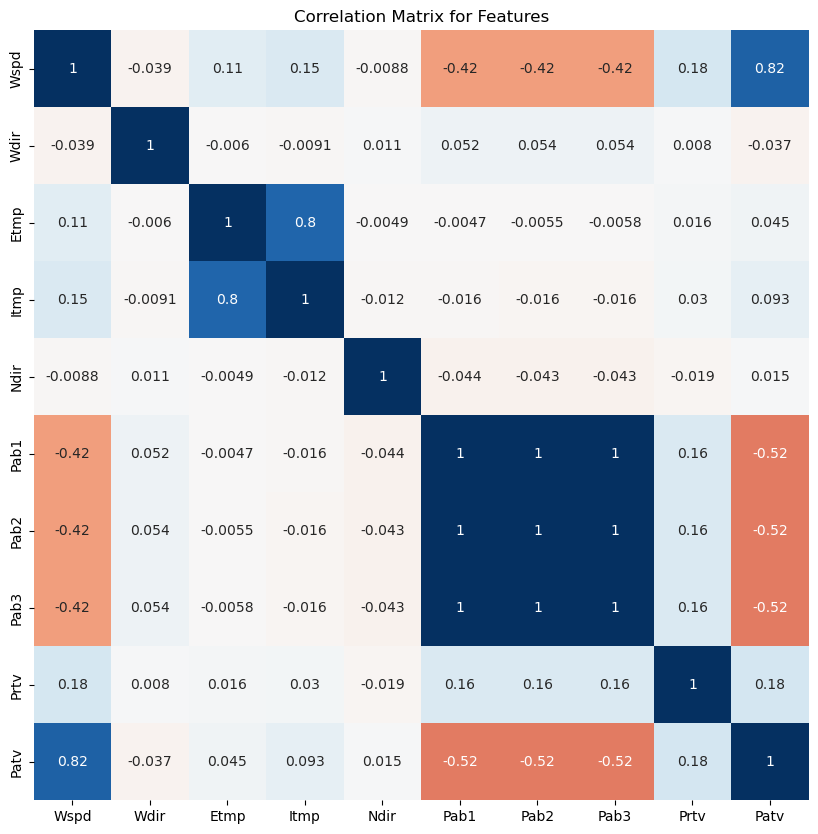

In [71]:
correlation_matrix(top_turbines[numerical_features])

# Time Series

In [73]:
#Formating datetime before starting the time series visualisations 

In [74]:
def format_datetime(
    data: pd.core.frame.DataFrame, initial_date_str: str
) -> pd.core.frame.DataFrame:
    
    if "Datetime" in data.columns:
        return data
    
    initial_date = datetime.strptime(initial_date_str, "%d %m %Y").date()
    
    data["Date"] = data.apply(
        lambda x: str(initial_date + timedelta(days=(x.Day -1))), axis=1
    )
    
    data["Datetime"] = data.apply(
        lambda x: datetime.strptime(f"{x.Date} {x.Tmstamp}", "%Y-%m-%d %H:%M"), axis=1
    )
    
    data.drop(["Day", "Tmstamp", "Date"], axis=1, inplace=True)
    
    data =  data[['Datetime'] + [col for col in list(data.columns) if col != 'Datetime']]
    
    return data


In [76]:
raw_data = format_datetime(top_turbines, initial_date_str='01 05 2020')

C:\Users\aturk\AppData\Local\Temp\ipykernel_12156\2506281425.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"] = data.apply(
C:\Users\aturk\AppData\Local\Temp\ipykernel_12156\2506281425.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Datetime"] = data.apply(
C:\Users\aturk\AppData\Local\Temp\ipykernel_12156\2506281425.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [77]:
raw_data.head()

,Datetime,TurbID,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
35281,2020-05-01 00:10:00,2,6.85,-6.73,25.45,35.52,25.25,0.78,0.78,0.78,-0.16,449.83
35282,2020-05-01 00:20:00,2,7.02,-9.77,25.34,35.85,25.25,0.05,0.05,0.05,-0.19,449.67
35283,2020-05-01 00:30:00,2,7.26,-9.75,25.29,35.68,25.25,0.68,0.68,0.68,-0.14,474.48
35284,2020-05-01 00:40:00,2,7.00,-8.40,25.29,35.44,25.25,0.20,0.20,0.20,-0.15,457.90
35285,2020-05-01 00:50:00,2,6.94,-9.89,25.21,35.34,25.25,0.02,0.02,0.02,-0.18,428.38


## Plotting time series 


In [79]:
def plot_time_series(df: pd.core.frame.DataFrame, features: List[str]):
    
    def plot_time_series(turbine, feature, date_range, fix_temps):
        data = df[df.TurbID == turbine]
        
        if fix_temps:
            min_etemp = data["Etmp"].quantile(0.01)
            data['Etmp'] = data['Etmp'].apply(
                lambda x: np.nan if x < min_etemp else x
            )
            
            data["Etmp"] = data["Etmp"].interpolate()
            min_itemp = data["Itmp"].quantile(0.01)
            data["Itmp"] = data["Itmp"].apply(
                lambda x: np.nan if x < min_itemp else x
            )
            
            data["Itmp"] = data["Itmp"].interpolate()
            
        data = data[data.Datetime > date_range[0]]
        data = data[data.Datetime < date_range[1]]
        
        plt.figure(figsize = (15,5))
        
        plt.plot(data["Datetime"], data[feature], "-")
        plt.title(f"Time series of {feature}", fontsize=25)
        plt.ylabel(f"{feature}", fontsize=20)
        plt.xlabel(f"Date", fontsize=20)
        plt.tick_params(axis='both', labelsize=15)
        plt.show()
        
    turbine_selection = widgets.Dropdown(
        options=df.TurbID.unique(),
        value=df.TurbID.unique()[-1],
        description="Turbine ID",
    )

    feature_selection = widgets.Dropdown(
        options=features,
        description="Feature",
    )

    dates = pd.date_range(datetime(2020, 5, 1), datetime(2020, 12, 31), freq="D")

    options = [(date.strftime("%b %d"), date) for date in dates]
    index = (0, len(options) - 1)

    date_slider_selection = widgets.SelectionRangeSlider(
        options=options,
        index=index,
        description="Date (2020)",
        orientation="horizontal",
        layout={"width": "550px"},
    )

    fix_temps_button = widgets.Checkbox(
        value=False, description="Fix Temperatures", disabled=False
    )

    interact(
        plot_time_series,
        turbine=turbine_selection,
        feature=feature_selection,
        date_range=date_slider_selection,
        fix_temps=fix_temps_button,
    )       

In [80]:
plot_time_series(top_turbines, numerical_features)

interactive(children=(Dropdown(description='Turbine ID', index=8, options=(2, 3, 4, 5, 8, 9, 10, 11, 69), valu…

## Pair Time Series

In [81]:
def time_series_turbine_pair(original_df: pd.core.frame.DataFrame, features = List[str]):
    
    def plot_time_series(turbine_1, turbine_2, feature, date_range, fix_temps):
        df = original_df
        if fix_temps:
            df_2 = original_df.copy(deep=True)
            min_etemp = df_2["Etmp"].quantile(0.01)
            df_2["Etmp"] = df_2["Etmp"].apply(
                lambda x: np.nan if x < min_etemp else x
            )
            df_2["Etmp"] = df_2["Etmp"].interpolate()
            min_itemp = df_2["Itmp"].quantile(0.01)
            df_2["Itmp"] = df_2["Itmp"].apply(
                lambda x: np.nan if x < min_itemp else x
            )
            df_2["Itmp"] = df_2["Itmp"].interpolate()
            df = df_2

        data_1 = df[df.TurbID == turbine_1]
        data_1 = data_1[data_1.Datetime > date_range[0]]
        data_1 = data_1[data_1.Datetime < date_range[1]]

        data_2 = df[df.TurbID == turbine_2]
        data_2 = data_2[data_2.Datetime > date_range[0]]
        data_2 = data_2[data_2.Datetime < date_range[1]]

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 5))
        ax1.plot(data_1["Datetime"], data_1[feature], "-")
        ax1.set_title(f"Time series of {feature} for turbine {turbine_1}", fontsize=25)
        ax2.plot(data_2["Datetime"], data_2[feature], "-", c="green")
        ax2.set_title(f"Time series of {feature} for turbine {turbine_2}", fontsize=25)
        ax1.set_ylabel(f"{feature}", fontsize=20)
        ax2.set_ylabel(f"{feature}", fontsize=20)
        ax1.set_xlabel(f"Date", fontsize=20)
        ax2.set_xlabel(f"Date", fontsize=20)
        plt.tick_params(axis="both", labelsize=15)
        plt.tight_layout()
        plt.show()

    turbine_selection_1 = widgets.Dropdown(
        options=original_df.TurbID.unique(),
        value=original_df.TurbID.unique()[-2],
        description="Turbine ID",
    )

    turbine_selection_2 = widgets.Dropdown(
        options=original_df.TurbID.unique(),
        value=original_df.TurbID.unique()[-1],
        description="Another Turbine ID",
        style={"description_width": "initial"},
    )

    feature_selection = widgets.Dropdown(
        options=features,
        description="Feature",
    )

    fix_temps_button = widgets.Checkbox(
        value=False, description="Fix Temperatures", disabled=False
    )

    dates = pd.date_range(datetime(2020, 5, 1), datetime(2020, 12, 31), freq="D")

    options = [(date.strftime("%b %d"), date) for date in dates]
    index = (0, len(options) - 1)

    date_slider_selection = widgets.SelectionRangeSlider(
        options=options,
        index=index,
        description="Date (2020)",
        orientation="horizontal",
        layout={"width": "550px"},
    )

    interact(
        plot_time_series,
        turbine_1=turbine_selection_1,
        turbine_2=turbine_selection_2,
        feature=feature_selection,
        date_range=date_slider_selection,
        fix_temps=fix_temps_button,
    )

In [82]:
time_series_turbine_pair(top_turbines, numerical_features)

interactive(children=(Dropdown(description='Turbine ID', index=7, options=(2, 3, 4, 5, 8, 9, 10, 11, 69), valu…